## Aufg 4
### Rotation von Bildern

## Aufg 4.1
Drehung um 45°

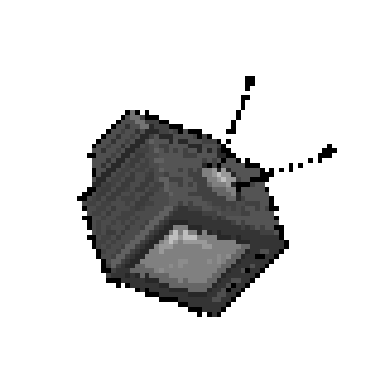

In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import itertools

def rotate_image(image, angle):
    # Bildgröße des Originalbildes
    h, w = image.shape[:2]
    
    # Berechnung der Größe des Zielbildes
    new_h = int(np.floor(np.sqrt(2) * h))
    new_w = int(np.floor(np.sqrt(2) * w))
    
    # Mittelpunkt des Originalbildes
    center_x = w / 2
    center_y = h / 2
    
    # Winkel in Bogenmaß umrechnen
    angle_rad = np.radians(angle)
    
    # Zielbild erstellen
    target_image = np.zeros((new_h, new_w), dtype=image.dtype)
    
    # Pixel im Zielbild bestimmen
    for y, x in itertools.product(range(new_h), range(new_w)):
        # Ursprüngliche Koordinaten relativ zum Mittelpunkt berechnen
        rel_x = x - new_w / 2
        rel_y = y - new_h / 2
        
        # Ursprüngliche Koordinaten rotieren
        orig_x = rel_x * np.cos(angle_rad) + rel_y * np.sin(angle_rad)
        orig_y = -rel_x * np.sin(angle_rad) + rel_y * np.cos(angle_rad)
        
        # Ursprüngliche Koordinaten relativ zum Ursprung verschieben
        orig_x += center_x
        orig_y += center_y
        
        # Nächste ganzzahlige Koordinaten bestimmen
        orig_x = int(np.round(orig_x))
        orig_y = int(np.round(orig_y))
        
        # Überprüfen, ob die Koordinaten innerhalb des Originalbildes liegen
        if 0 <= orig_x < w and 0 <= orig_y < h:
            target_image[y, x] = image[orig_y, orig_x]
        else:
            # Pixel außerhalb des Originalbildes auf den nächsten vorhandenen Wert setzen
            min_x = max(0, min(orig_x, w - 1))
            max_x = min(w - 1, max(orig_x, 0))
            min_y = max(0, min(orig_y, h - 1))
            max_y = min(h - 1, max(orig_y, 0))
            target_image[y, x] = image[min_y:max_y+1, min_x:max_x+1].mean()
    
    return target_image

# Beispielanwendung
image = imread('./tv.png')
angle = 45.0  # Beliebiger Rotationswinkel

target_image = rotate_image(image, angle)

# Ergebnis anzeigen
plt.imshow(target_image, cmap='gray')
plt.axis('off')
plt.show()

# Ergebnisbild speichern
imsave('output_tv.jpg', target_image)


## Aufg 4.2


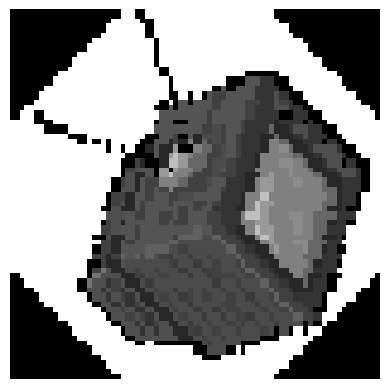

In [7]:
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import rotate
import matplotlib.pyplot as plt
import itertools

def rotate_image2(image, angle):
    # Bildgröße des Originalbildes
    h, w = image.shape[:2]
    
    # Berechnung der Größe des Zielbildes
    new_h = int(np.floor(np.sqrt(2) * h))
    new_w = int(np.floor(np.sqrt(2) * w))
    
    # Bildrotation mit skimage.rotate durchführen
    rotated_image = rotate(image, angle, resize=False,order=0)
    
    # Zielbild erstellen
    target_image = np.zeros((new_h, new_w), dtype=image.dtype)
    
    # Skalierungsfaktoren berechnen
    scale_h = new_h / h
    scale_w = new_w / w
    
    # Pixel im Zielbild bestimmen
    for y, x in itertools.product(range(new_h), range(new_w)):
        # Ursprüngliche Koordinaten berechnen
        orig_x = int(x / scale_w)
        orig_y = int(y / scale_h)
        
        # Nearest Neighbor Interpolation
        target_image[y, x] = rotated_image[orig_y, orig_x]
    
    return target_image

# Beispielanwendung
image = imread('./tv.png')
angle = 45.0  # Beliebiger Rotationswinkel

target_image = rotate_image2(image, angle)

# Ergebnis anzeigen
plt.imshow(target_image, cmap='gray')
plt.axis('off')
plt.show()

# Ergebnisbild speichern
imsave('output_image.jpg', target_image)
